In [30]:

import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import bokeh
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)  
import plotly as py
import plotly.graph_objs as go


In [31]:
df=pd.read_csv(r'C:\Users\Matt\Desktop\suicide-rates-unit2-project\master.csv')
df.head() # have a look on the data table

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# First glance on the data

First Let us investigate the global trend in number of suicides versus year and see if there is a global correlation with the GDP?

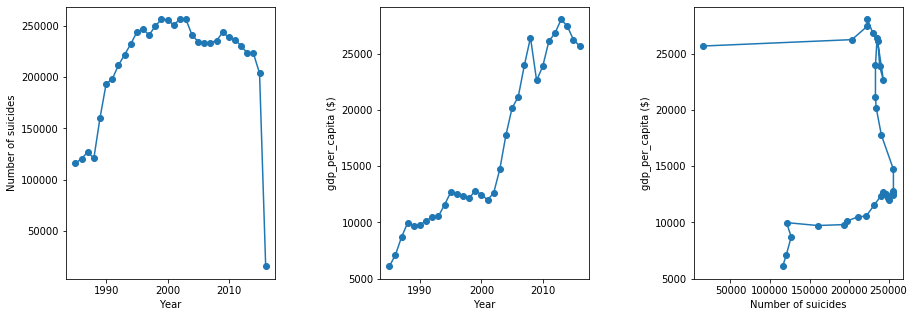

In [32]:
years = sorted(df.year.unique())
total_suicides = []
avg_gdp = []
for year in sorted(years):
    total_suicides.append(df[df['year']==year]['suicides_no'].sum())
    avg_gdp.append(df[df['year']==year]['gdp_per_capita ($)'].mean())

fig , (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5)) 
ax1.plot(years,total_suicides,'-o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of suicides')


ax2.plot(years, avg_gdp,'-o')
ax2.set_xlabel('Year')
ax2.set_ylabel('gdp_per_capita ($)')

ax3.plot(total_suicides, avg_gdp,'-o')
ax3.set_xlabel('Number of suicides')
ax3.set_ylabel('gdp_per_capita ($)')
fig.subplots_adjust(wspace=0.5)

Apperently, the data for year 2016 is not full, so it has to be excluded.

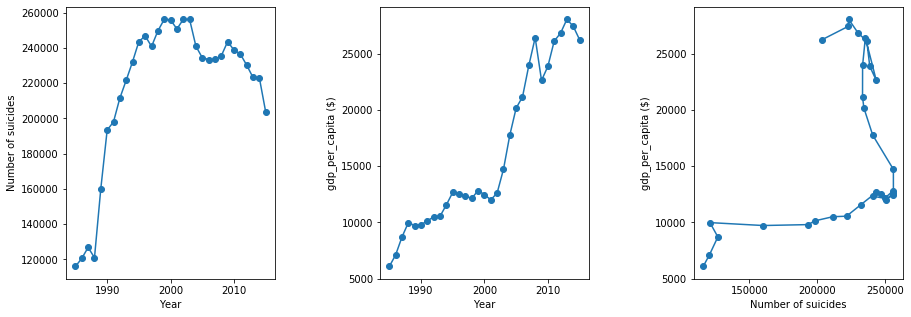

In [33]:
df=df[df.year!=2016] #drop year 2016

years = sorted(df.year.unique())
total_suicides = []
avg_gdp = []
for year in sorted(years):
    total_suicides.append(df[df['year']==year]['suicides_no'].sum())
    avg_gdp.append(df[df['year']==year]['gdp_per_capita ($)'].mean())

fig , (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5)) 
ax1.plot(years,total_suicides,'-o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of suicides')


ax2.plot(years, avg_gdp,'-o')
ax2.set_xlabel('Year')
ax2.set_ylabel('gdp_per_capita ($)')

ax3.plot(total_suicides, avg_gdp,'-o')
ax3.set_xlabel('Number of suicides')
ax3.set_ylabel('gdp_per_capita ($)')
fig.subplots_adjust(wspace=0.5)

# Time relation of suicides vs GDP

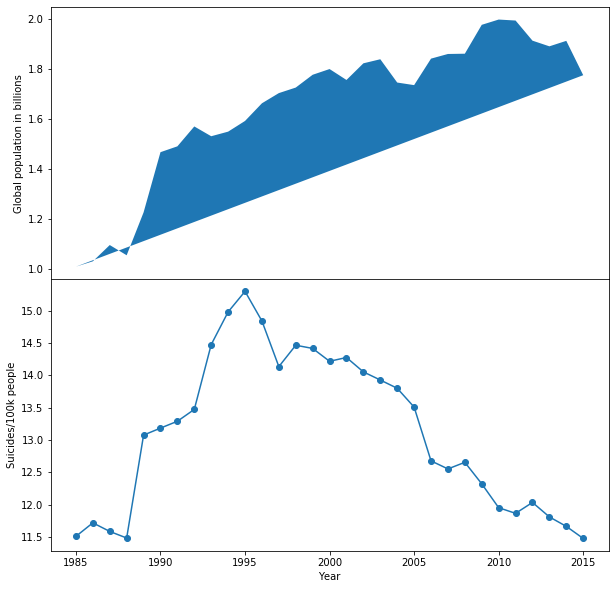

In [34]:
population = []
for year in sorted(years):
    population.append(df[df['year']==year]['population'].sum())

fig , (ax1,ax2) = plt.subplots(2,1,figsize=(10,10),sharex=True)
ax1.fill(years,np.array(population)/1e9)
ax1.set_ylabel('Global population in billions')

ax2.plot(years,np.array(total_suicides)/np.array(population)*100000,'-o')
ax2.set_xlabel('Year')
ax2.set_ylabel('Suicides/100k people')
fig.subplots_adjust(hspace=0)

Nice, we now can see clearly that since 1985 the rate of suicides increased by 33%, having its maximum in 1994, and after, started to deacrease, reaching in 2015 the values of 1985. This is irregardless of much higher population. So maybe people are getting happier?

What about the age of the suiciders, who are more likely to commit a suicide, a teenager, an adult?

In [35]:
age_groups = df['age'].unique()
# sorted string values according to the float key
age_groups = sorted(age_groups,key=lambda x: float(x[0:1])) 
age_groups.insert(0, age_groups.pop(4))

suicides = [[df[df['age']==age]['suicides_no'].sum()] for age in age_groups]
suicides = np.array(suicides).reshape(len(suicides))
suicides = suicides/sum(suicides) #probability distribution

data = [go.Bar(
            x=age_groups,
            y=suicides
    )]

py.offline.iplot(data, filename='Age-suicide')

What about gender ratio?


In [36]:
suicides_male = [[df[df['age']==age][df['sex']=='male']['suicides_no'].sum()] for age in age_groups]
suicides_male = np.array(suicides_male).reshape(len(suicides))
suicides_male = suicides_male/sum(suicides_male) #probability distribution

suicides_female = [[df[df['age']==age][df['sex']=='female']['suicides_no'].sum()] for age in age_groups]
suicides_female = np.array(suicides_female).reshape(len(suicides))
suicides_female = suicides_female/sum(suicides_female) #probability distribution

trace1 = go.Bar(
    x=age_groups,
    y=suicides_male,
    name='Male'
)
trace2 = go.Bar(
    x=age_groups,
    y=suicides_female,
    name='Female'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

py.offline.iplot(data, filename='male/female')

C:\Users\Matt\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\Matt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Hoho, interesting, the ratio changes dependent on the age group. While for teens and middle-aged females are less likely to commit a suicide, for elderly and kids groups we can see an opposite. In principle, for elder group we can understand it according to the longer life expactancy for women. But the kid group show a wierd result, the probability is almost two times higher for girls...

We can see that adults, who are in the middle of their life are most probable to commite suicide. Career problems, divorses, simple anxiety? Who knows? But it is interesting to have a look if it has always been like this?

#  Distribution over the years

In [37]:
SPR = [] # suicides per year
for year in years:
    suicides = [[df[(df['year']==year)&(df['age']==age)]['suicides_no'].sum()] for age in age_groups]
    suicides = np.array(suicides).reshape(len(suicides))
    suicides = suicides/sum(suicides) #probability distribution
    SPR.append(suicides)

SPR = np.array(SPR)
SPR.shape

(31, 6)

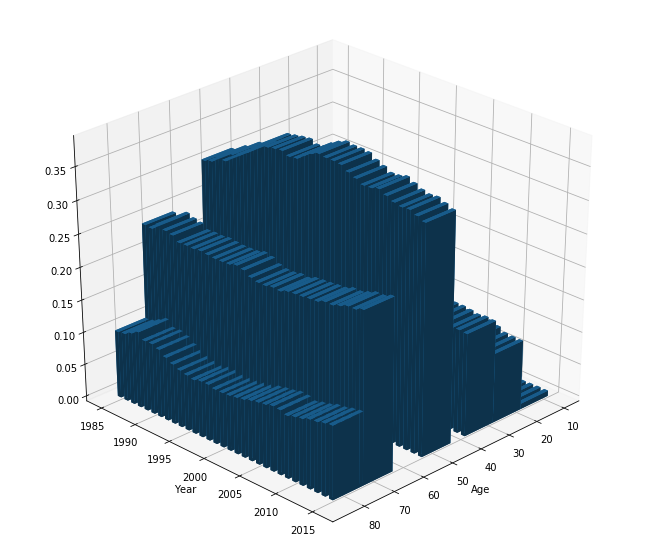

In [38]:
ag=[10,20,30,45,65,75]
X,Y = np.meshgrid(ag,years)
X, Y = X.ravel(), Y.ravel()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(121, projection='3d')
bottom = np.zeros_like(SPR.flatten())
width = 10
depth=0.5
ax1.bar3d(X, Y, bottom, width, depth, SPR.flatten())
ax1.set_xlabel('Age')
ax1.set_ylabel('Year')
ax1.view_init(30, 45)

The matplotlib does the job, but it looks pretty ugly. Let us try another plot using plotly.

In [39]:
trace1 = go.Bar(
    x=years,
    y=[s[:][0] for s in SPR],
    name=age_groups[0],
    marker=dict(
        color='rgb(204, 0, 0)'
    )
)

trace2 = go.Bar(
    x=years,
    y=[s[:][1] for s in SPR],
    name=age_groups[1],
    marker=dict(
        color='rgb(255, 102, 0)'
    )
)


trace3 = go.Bar(
    x=years,
    y=[s[:][2] for s in SPR],
    name=age_groups[2],
    marker=dict(
        color='rgb(204, 204, 0)'
    )
)


trace4 = go.Bar(
    x=years,
    y=[s[:][3] for s in SPR],
    name=age_groups[3],
    marker=dict(
        color='rgb(0, 204, 0)'
    )
)


trace5 = go.Bar(
    x=years,
    y=[s[:][4] for s in SPR],
    name=age_groups[4],
    marker=dict(
        color='rgb(0, 204, 204)'
    )
)

trace6 = go.Bar(
    x=years,
    y=[s[:][5] for s in SPR],
    name=age_groups[5],
    marker=dict(
        color='rgb(0, 0, 204)'
    )
)

data = [trace1, trace2, trace3, trace4, trace5, trace6]
layout = go.Layout(
    title='Suicides over the years',
    xaxis=dict(
        tickfont=dict(
            size=18,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Suicide probability',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(0, 0, 0, 0)'
    ),
    barmode='group',
    bargap=0.2,
    bargroupgap=0.15
)

py.offline.iplot(data, filename='year-age')

Good, now we can see that over the years  the distribution remained almost similar, with a bit increasing suicide levels for middleagers in 2000s! I mean .com bubble, you know? I guess it was a time of broken dreams. (Note: you can activate and deactivate the age groups simply by clicking on the label on the legend).

# Geospatial data

Now it is time for geospatial data, lets see which nation is the most inclined towards suicides? I bet on japan! We will use plotly and its beautiful maps to visualize the data. But before we have to prepare data. We simply make a mapper function MapData to extract the data we need and form a list Data for the plotly.

In [40]:
def MapData(year,df):
    ydb=df[df['year']==year]
    out={}
    for count in np.unique(ydb.country.values):
        suic=sum(ydb[ydb['country']==count]['suicides/100k pop'])
        out[count]=suic
    result=pd.DataFrame(out,index=[1])
    return result.transpose()

In [41]:
Data=[MapData(year,df) for year in years]

This one now contains a list of DataFrames for each year, which we can plot on the Map, and distinguish between years using a slider.

In [42]:
# Compose data list using all Dataframes from Data variable
data = [ dict(
        type = 'choropleth',
        locationmode='country names',
        locations = ybd.index, #ydb['Country'],
        z = ybd[1].values,
        text = ybd.index,#df['Country'],
        colorscale = [[0,"rgb(255, 12, 12)"],[0.35,"rgb(255, 122, 12)"],[0.5,"rgb(255, 150, 12)"],\
            [0.6,"rgb(225, 180, 12)"],[0.7,"rgb(225, 239, 12)"],[1,"rgb(225, 225, 225)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            
            tickprefix = '',
            title = 'Suicides/100K'),
      ) for ybd in Data]




# Generate steps and sliders to update the graph
steps = []
for i in range(len(data)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data)],
                label='Year {}'.format(i + 1985))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=0,
                pad={"t": 1},
                steps=steps)]


# Make up a layout of the graph
layout = dict(
    title = 'Global Suicide levels',
    width = 1000,
    height = 1000,
    geo = dict(
        showframe = False,
        showcoastlines = True,
        
        projection = dict(
            type = 'natural earth'
        )
    ),
    sliders = sliders,
)

    

# Initialize
fig = dict( data=data, layout=layout )
plot = py.offline.iplot( fig, validate=False, filename='d3-world-map' )

In [43]:
from IPython.display import HTML, display
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# Code used to export to html
plot(data, filename='world-heat-map.html', auto_open=False)


'world-heat-map.html'

In [44]:

year_trend=df.groupby(['year','country']).sum()['suicides/100k pop']
year_trend.loc[2000].index

Index(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Ecuador', 'El Salvador', 'Estonia', 'Finland', 'France',
       'Georgia', 'Germany', 'Greece', 'Guatemala', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan',
       'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg',
       'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Montenegro', 'Netherlands',
       'New Zealand', 'Norway', 'Panama', 'Paraguay', 'Philippines', 'Poland',
       'Portugal', 'Puerto Rico', 'Republic of Korea', 'Romania',
       'Russian Federation', 'Saint Lucia', 'Saint Vincent and Grenadines',
       'San Marino', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia',
       'South Afr

In [45]:
data=[go.Bar(
    x=year_trend.loc[i].sort_values(ascending=True).values,
    y=year_trend.loc[i].sort_values(ascending=True).index,
    width= 0.5,
    orientation = 'h',
    name=''
) for i in years]

steps = []
for i in range(len(years)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data)],
                label='Year {}'.format(i + 1985))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=0,
                pad={"t": 1},
                steps=steps)]


layout = dict(
    title = 'Suicides per 100K',
    barmode = 'group',
    autosize=False,
    width=1000,
    height=1000,
    bargap=0.5,
    bargroupgap=1,
    sliders = sliders,
)

fig = dict( data=data, layout=layout )
py.offline.iplot( fig, validate=False, filename='Year trends of suicide levels' )

In [46]:
annual_trends = df.groupby(['year','country']).sum()['suicides_no']

annual_largest = []

for i in sorted(years):
    small = annual_trends.loc[i].nsmallest(len(annual_trends.loc[i].index) - 5).sum() # find the sum of all suicides except top 5 countries in year i
    large = annual_trends.loc[i].nlargest(5)
    annual_largest.append(large.append(pd.Series({'Others':small})))





In [47]:
data=[go.Pie(
    labels = annual_largest[i].index,
    values = annual_largest[i].values,
    textinfo = "label+value+percent",
    hole = 0.4,
    marker=dict(
        line=dict(color='#ffffff', width=8)
        ),
    name = 'Country'
) for i in range(len(years))]

steps = []
for i in range(len(years)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data)],
                label='Year {}'.format(i + 1985))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=0,
                pad={"t": 1},
                steps=steps)]


layout = dict(
    title = 'Top 5 countries on amount of commited suicides',
    
    sliders = sliders,
)

fig = dict( data=data, layout=layout )
py.offline.iplot( fig, validate=False, filename='Year trends of suicide levels' )

In [48]:
countries = ['United States', 'Japan','Russian Federation','Ukraine','France', 'Germany']
total_by_country = df.groupby(['country','year']).sum()['suicides_no']
relative_by_country = df.groupby(['country','year']).sum()['suicides/100k pop']



In [49]:
data=[go.Scatter(
    x = years,
    y = total_by_country[i].values,
    mode= 'lines+markers',
    name = i
) for i in countries]

data2=[go.Scatter(
    x = years,
    y = relative_by_country[i].values,
    mode= 'lines+markers',
    xaxis='x2',
    yaxis='y2',
    name = i
) for i in countries]


layout = dict(
    title = 'Total amount of commited suicides',
    width = 700,
    height = 700
   
)


fig = dict( data=data, layout=layout )
plot = py.offline.iplot( fig, validate=False, filename='Year trends of suicide levels' )



In [50]:
from IPython.display import HTML, display
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
plot(data, filename='no_suicides_top5.html', auto_open=False)

'no_suicides_top5.html'

In [54]:
layout = dict(
    title = 'Suicides per 100K',
    width = 700,
    height = 700
   
)
fig = dict( data=data2, layout=layout )
plot = py.offline.iplot( fig, validate=False, filename='Year trends of suicide levels' )

In [55]:
from IPython.display import HTML, display
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
plot(data2, filename='no_suicides_top5.html', auto_open=False)

'no_suicides_top5.html'

In [53]:
generations = pd.unique(df['generation']) # take all the existing generations

gen_suic = [df[df['generation']== gen]['suicides_no'].sum() for gen in generations] # sum over the generations

trace1 = go.Bar(
    x=gen_suic,
    y=generations,
    orientation = 'h',
    name='Generational suicides'
)


data = [trace1]
layout = go.Layout(
    barmode='group'
)

py.offline.iplot(data, filename='Gen_suic')
